# Unsupervised Learning Solution
### EDSA - Movie Recommendation 2024 


© Explore Data Science Academy

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2205222%2Fbca114f2e4f6b9b46f2cc76527d7401e%2FImage_header.png?generation=1593773828621598&alt=media" width=100%/> 

<a id="cont"></a>
## Table of Content

<a href=#one> Introduction</a>
       
<a href=#two>1. Import Packages</a>

<a href=#three>2. Loading Data</a>

<a href=#four>4. Exploratory Data Analysis (EDA)<a>
    
<a href=#five>5. Data Processing</a>

<a href=#six>6. Feature Engineering</a>

<a href=#seven>7. Modelling</a>

<a href=#eight>8. Model Performance</a>

<a href=#nine>9. Saving & Exporting Model</a>

<a href=#ten>10. Conclusion</a>

<a href=#eleven>11. Recommendation</a>

<a href=#ref>Reference Document Links</a>

<a id="one"></a>
#  INTRODUCTION
<a href=#cont>Back to Table of Contents</a>


### Predict Overview: 

Recommender systems have become indispensable tools in our modern society, profoundly impacting various aspects of our daily routines and shaping our interactions with digital platforms, products, and services. Particularly in the realm of online marketplaces and e-commerce, where a vast array of products is available, recommender systems are instrumental in helping users discover relevant and personalized recommendations, thereby mitigating information overload and enhancing the overall shopping experience. By analyzing user behavior and preferences, these systems facilitate the discovery of products that resonate with individual interests, ultimately leading to heightened customer satisfaction and loyalty. Consequently, businesses benefit from increased sales and the cultivation of a more engaged customer base.

The influence of recommender systems extends beyond e-commerce to encompass diverse domains such as entertainment, social media, and content streaming services. Platforms like Netflix, Spotify, and YouTube leverage recommendation algorithms to curate customized content playlists, ensuring that users receive content tailored to their tastes and preferences. This not only boosts user engagement but also aids content creators in reaching their target audience more efficiently. Moreover, recommender systems play a crucial role in promoting content diversity by introducing users to new genres, artists, or authors they may not have encountered otherwise, thereby enriching their cultural experiences.

In this project, we will explore various types of recommender systems and delve into their implementation strategies.

### Problem Statement

In this project, our objective is to develop an effective movie recommender system by integrating collaborative filtering and content-based techniques. We will utilize a comprehensive dataset containing millions of 5-star ratings collected from users of the MovieLens movie recommendation service. This dataset has been enhanced with additional information and resampled to ensure fair evaluation.

Our goal is to build a personalized movie recommendation engine that suggests relevant films to users based on their past movie preferences and the attributes of the movies themselves. We'll employ collaborative filtering, which examines user-item interactions to identify similarities between users and items, as well as content-based filtering, which analyzes movie characteristics such as genre, actors, and directors to find similar movies.

By combining collaborative and content-based approaches, we aim to overcome the limitations inherent in each method and provide more accurate and diverse movie recommendations. The project will involve various stages including data preprocessing, feature engineering, model training, and evaluation to ensure the final recommender system delivers high-quality suggestions that enhance user satisfaction and engagement. Our ultimate objective is to contribute to the advancement of recommender systems and empower users with personalized movie recommendations for an enriching entertainment experience.






<a id="two"></a>
# 2. IMPORT PACKAGES
<a href=#cont>Back to Table of Contents</a>


In [ ]:
# # Install Comet
# !pip install comet_ml

In [3]:
# Import Comet package
from comet_ml import Experiment

# Setting the API key

experiment = Experiment(
    api_key="NvXN4L0t7xTdVBgefYcUjyCjM",
    project_name="edsa-movie-recommendation",
    workspace="sanelisiwe19",
    log_code=True,
    log_graph=True,
    auto_param_logging=True,
    auto_metric_logging=True
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in 'C:\\Users\\suppo\\Downloads\\ea-movie-recommendation-predict-2023-2024' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/sanelisiwe19/edsa-movie-recommendation/7622a445615a46b49800c743fe9afe89



Required Installations

In [ ]:
# %%capture
# !pip install surprise
# !pip install pandas

# !pip install scikit-surprise

In [ ]:
# %%capture
# !pip install surprise
# !pip install pandas
# !pip install scikit-surprise
# !pip install scikit-learn
# !pip install matplotlib
# !pip install seaborn
# !pip install plotly
# !pip install fuzzywuzzy
# !pip install WordCloud
# !pip install cufflinks

In [4]:
# Install the required packages
!pip install scikit-surprise
!pip install pandas

# Import the necessary modules


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/772.0 kB ? eta -:--:--
     --- ----------------------------------- 61.4/772.0 kB 1.7 MB/s eta 0:00:01
     ----- -------------------------------- 112.6/772.0 kB 1.3 MB/s eta 0:00:01
     -------- ----------------------------- 174.1/772.0 kB 1.5 MB/s eta 0:00:01
     ---------- --------------------------- 204.8/772.0 kB 1.2 MB/s eta 0:00:01
     ------------ ------------------------- 256.0/772.0 kB 1.2 MB/s eta 0:00:01
     --------------- ---------------------- 307.2/772.0 kB 1.3 MB/s eta 0:00:01
     ----------------- -------------------- 358.4/772.0 kB 1.2 MB/s eta 0:00:01
     -------------------- ----------------- 409.6/772.0 kB 1.2 MB/s eta 0:00:01
     ---------------------- --------------- 460.8/772.0 kB 1.3 MB/s eta 0:00:01
     -------------------------- ----------- 532.5/772.0 kB 1.2 MB/s eta 0:00:01
     ---------------------------- --------- 573.4

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable


In [32]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd                                                   # <-- for loading CSV data
import numpy as np                                                    # <-- Used for mathematical operations
import matplotlib.pyplot as plt                                       # <-- for Graphical Representation                                                 
import seaborn as sns                                                 # <-- for specialized plots                                                         
import scipy as sp                                                    # <-- Used in our code for numerical efficientcy. 
import plotly.express as px                                           # <-- for specialized plots  
from PIL import Image
from wordcloud import WordCloud, STOPWORDS                            # <-- To Check most pertinent parts of textual data
sns.set()                                                             # <-- set plot style

# Libraries for data preparation
from datetime import datetime
from nltk.tokenize import TweetTokenizer
from nltk.corpus import wordnet

# Libraries for featurization and similarity computation
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from fuzzywuzzy import fuzz

# Libraries for Model Building
import surprise
from surprise import Reader, Dataset, SVD
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering

# Libraries used during sorting procedures.
import operator                                                       # <-- Convienient item retrieval during iteration 
import heapq                                                          # <-- Efficient sorting of large lists

# Libraries for calculating performance metrics
import time
from surprise.model_selection import cross_validate
from surprise.accuracy import rmse
from surprise import accuracy

# Libraries to Save/Restore Models
import pickle                                                         # <-- To Export Model
from surprise import dump                                             # <-- Aids dump model to be saved as PKL.
import os

import gc                                                             # <-- Gabage Collector
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

ModuleNotFoundError: No module named 'fuzzywuzzy'

<a id="three"></a>
# 3. Loading Data
<a href=#cont>Back to Table of Contents</a>

In [33]:
# from google.colab import drive
# drive.mount('/content/drive')


In [34]:
import os

# Path to the folder containing your CSV files
folder_path = "C:/Users/Acer/Documents/Software/ExploreAI/Sprint_07_Unsupervised_Learning/project/FM2_Unsupervised_Movie_Recommendation_model"

# Change the current working directory to the folder containing your CSV files
os.chdir(folder_path)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/Acer/Documents/Software/ExploreAI/Sprint_07_Unsupervised_Learning/project/FM2_Unsupervised_Movie_Recommendation_model'

In [35]:
# Load train.csv
train = pd.read_csv('train.csv')

# Load test.csv
test = pd.read_csv('test.csv')

# Load movies.csv
movies = pd.read_csv('movies.csv')

# Load imdb_data.csv
imdb_data = pd.read_csv('imdb_data.csv')

# Load genome_tags.csv
genome_tags = pd.read_csv('genome_tags.csv')

# Load tags.csv
tags = pd.read_csv('tags.csv')

# Load links.csv
links = pd.read_csv('links.csv')

# Load genome_scores.csv
genome_scores = pd.read_csv('genome_scores.csv')


<a id="four"></a>
# 4. Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>

In [36]:
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


#### Train:

UserId

movieId : Identifier for movies used

rating : Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

timestamp: represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

             userId       movieId        rating     timestamp
count  1.000004e+07  1.000004e+07  1.000004e+07  1.000004e+07
mean   8.119909e+04  2.138911e+04  3.533395e+00  1.215677e+09
std    4.679359e+04  3.919578e+04  1.061124e+00  2.268921e+08
min    1.000000e+00  1.000000e+00  5.000000e-01  7.896520e+08
25%    4.051000e+04  1.197000e+03  3.000000e+00  1.011742e+09
50%    8.091400e+04  2.947000e+03  3.500000e+00  1.199019e+09
75%    1.215790e+05  8.630000e+03  4.000000e+00  1.447242e+09
max    1.625410e+05  2.091710e+05  5.000000e+00  1.574328e+09


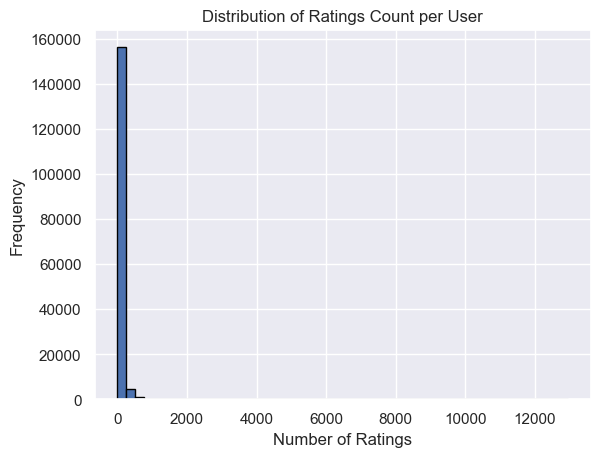

In [46]:
import matplotlib.pyplot as plt



# Display summary statistics of numerical features in train data
print(train.describe())

# Visualize the distribution of ratings for each user
user_rating_counts = train.groupby('userId')['rating'].count()
plt.hist(user_rating_counts, bins=50, edgecolor='black')
plt.title('Distribution of Ratings Count per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

In [47]:
# Establishing Range of Ratings
min_rating = train.rating.min()
max_rating = train.rating.max()
print(f'The RATING ranges between {min_rating} and {max_rating}')

The RATING ranges between 0.5 and 5.0


In [48]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [49]:
imdb_data.head(1)

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation


In [50]:
genome_tags.head(1)

,tagId,tag
0,1,007


**genome-tags:**

* tagId
* tag : tag descriptions for the tag IDs in the genome file

In [51]:
genome_scores.head(10)

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075
5,1,6,0.14675
6,1,7,0.06350
7,1,8,0.20375
8,1,9,0.20200
9,1,10,0.03075


**genome-scores:**

* movieId : Identifier for movies
* tagId :
* relevance

In [52]:
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


**tags:**

* userId
* movieId
* tag : User-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and * purpose of a particular tag is determined by each user.
* timestamp : represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

In [53]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [54]:
train.head(3)

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539


In [55]:
# Some Descriptive Stats of our base train data
round(train['rating'].describe(), 1)

count    10000038.0
mean            3.5
std             1.1
min             0.5
25%             3.0
50%             3.5
75%             4.0
max             5.0
Name: rating, dtype: float64

In [56]:
# Declare count of unique entries for features
unique_users = len(train['userId'].unique().tolist())
unique_movies = len(movies['movieId'].unique().tolist())
unique_actors = len(imdb_data['title_cast'].unique().tolist())
unique_directors = len(imdb_data['director'].unique().tolist())
unique_Movie_tags = len(tags['tag'].unique().tolist())

# Output Result in Dataframe
unique_characters = pd.DataFrame({"Users": [unique_users],
                                  "Tags" : [unique_Movie_tags],
                                  "Movies": [unique_movies],
                                  "Actors" : [unique_actors],
                                  "Directors" : [unique_directors],
                                 }, 
                                index=['Count of Unique Characters'])

# Print result
display(unique_characters.transpose())

,Count of Unique Characters
Users,162541
Tags,73051
Movies,62423
Actors,17144
Directors,11787


In [57]:
## Grouping users by count within range

##Create DataFrame with count by userID
user_count = pd.DataFrame(train['userId'].value_counts()).reset_index()
user_count.rename(columns={'index':'userId','userId':'count'}, inplace=True)

# Defining Group Between 1 - 50
first_group = user_count.loc[(user_count['count'] > 0) &                     
            (user_count['count'] < 50), 'userId'].value_counts().sum()
# Between 50 - 500
second_group = user_count.loc[(user_count['count'] >= 50) &  
            (user_count['count'] < 500), 'userId'].value_counts().sum()
# Between 500 - 1000
third_group = user_count.loc[(user_count['count'] >= 500) & 
            (user_count['count'] < 1000), 'userId'].value_counts().sum()
# Between 1000 - 1500
fourth_group = user_count.loc[(user_count['count'] >= 1000) & 
            (user_count['count'] < 1500), 'userId'].value_counts().sum()
# From 1500 above
fifth_group = user_count.loc[(user_count['count'] >= 1500),
            'userId'].value_counts().sum()

# To give us insight in the spread, we used figures to determine the spread.
trial_error = np.array([['First Group', first_group, 'Between 1 and 50'],
                        ['Second Group', second_group, 'Between 50 and 500'],
                        ['Third Group', third_group, 'Between 500 and 1000'],
                        ['Fourth Group', fourth_group, 'Between 1000 and 1500'],
                        ['Fifth Group', fifth_group, 'Greater than 1500']])

# Place array into Dataframe
trial = pd.DataFrame({'UserId Voting Group': trial_error[:, 0],
                               'Number per Group': trial_error[:, 1],
                               'Group Category': trial_error[:, 2]})
# Plot Bar Graph of Groupings
fig = px.bar(trial, x=trial["UserId Voting Group"], 
             y=trial_error_df["Number per Group"], color=trial["UserId Voting Group"], 
             title='Users Rating Distribution')
fig.show()
trial

,UserId Voting Group,Number per Group,Group Category
0,First Group,110010,Between 1 and 50
1,Second Group,50973,Between 50 and 500
2,Third Group,1338,Between 500 and 1000
3,Fourth Group,159,Between 1000 and 1500
4,Fifth Group,61,Greater than 1500


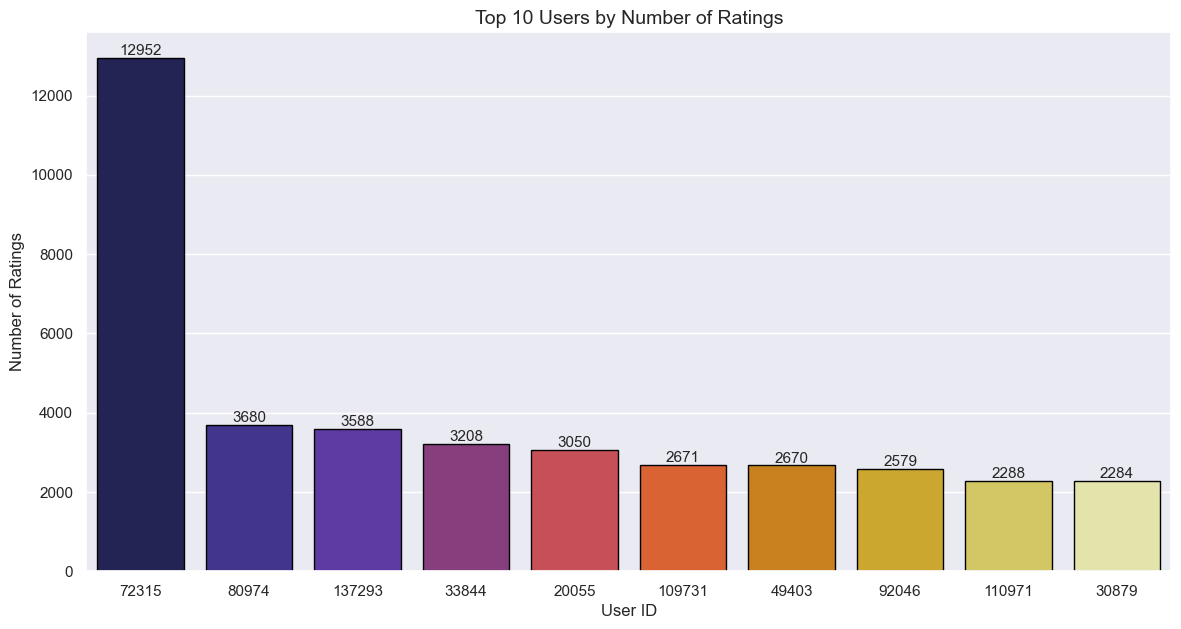

In [58]:
# Define Function that Reveals Users with Top Counts of Ratings
def user_ratings_count(df, n):
    plt.figure(figsize=(14,7))
    data = df['userId'].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index, palette='CMRmap', edgecolor="black")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Top {n} Users by Number of Ratings', fontsize=14)
    plt.xlabel('User ID')
    plt.ylabel('Number of Ratings')
    plt.show()

user_ratings_count(train,10)

In [61]:
# Let us merge our train data with the movies data

pd.set_option('display.max_colwidth', -1)   # To enable us view the full value of dataframe
movies = pd.merge(train, movies, on='movieId', how='left')
movies.head()

C:\Users\suppo\AppData\Local\Temp\ipykernel_18920\4175778569.py:3: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy
2,146790,5459,5.0,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (2002),Action|Comedy|Sci-Fi
3,106362,32296,2.0,1423042565,Miss Congeniality 2: Armed and Fabulous (2005),Adventure|Comedy|Crime
4,9041,366,3.0,833375837,"Wes Craven's New Nightmare (Nightmare on Elm Street Part 7: Freddy's Finale, A) (1994)",Drama|Horror|Mystery|Thriller


In [62]:
# We will add an additional data i.e df_imdb data
complete_movie = pd.merge(movies, imdb_data[['movieId', 'title_cast', 
                                                'director', 'plot_keywords']], 
                                                  on='movieId', how='left')
complete_movie.head(2)

,userId,movieId,rating,timestamp,title,genres,title_cast,director,plot_keywords
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjour|Mark Donovan|Ann Elsley|Colin Farrell|Jean-Marc Favorin|Ralph Fiennes|Brendan Gleeson|Eric Godon|Zeljko Ivanek|Sachi Kimura|Anna Madeley|Louis Nummy|Clémence Poésy,Martin McDonagh,dwarf|bruges|irish|hitman
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy,Steve Martin|Diane Keaton|Martin Short|Kimberly Williams-Paisley|George Newbern|Kieran Culkin|BD Wong|Peter Michael Goetz|Kate McGregor-Stewart|Jane Adams|Eugene Levy|Rebecca Chambers|April Ortiz|Dulcy Rogers|Kathy Anthony,Albert Hackett,fatherhood|doberman|dog|mansion


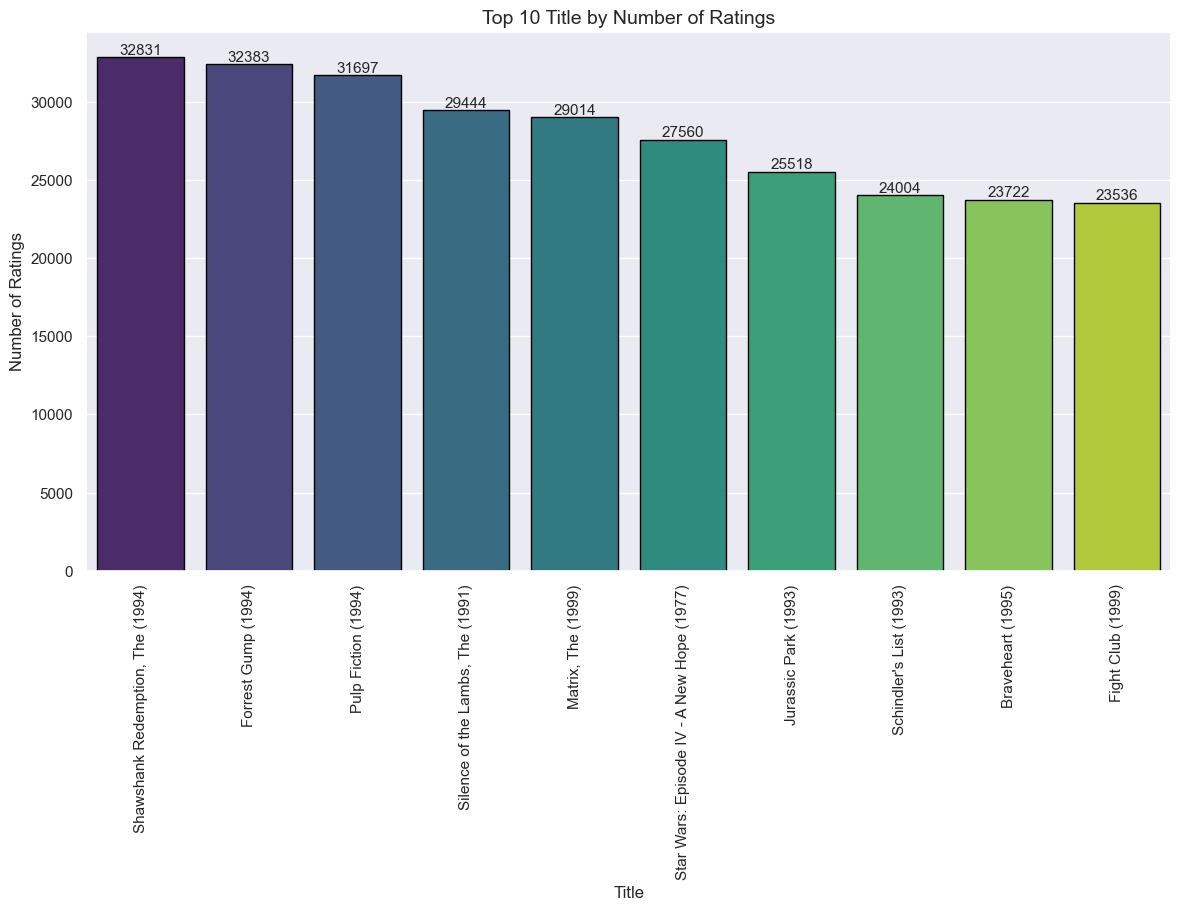

In [65]:
# Define the Function
def top_rating_plot(df, column, n):
    plt.figure(figsize=(14, 7))
    data = df[str(column)].value_counts().head(n)
    ax = sns.barplot(x=data.index, y=data, order=data.index, palette='viridis', edgecolor="black")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Top {n} {column.title()} by Number of Ratings', fontsize=14)
    plt.xlabel(column.title())
    plt.ylabel('Number of Ratings')
    plt.xticks(rotation=90)
    plt.show()

# Call Function; Get Top 10
top_rating_plot(movies, 'title', 10)


In [67]:
# Get the categories of Movie Genre per movie ID.
# Each Genre should stand unique to enable classification
movie_genres = pd.DataFrame(movies['genres'].str.split("|").tolist(),
                      index=movies['movieId']).stack()
movie_genres = movie_genres.reset_index([0, 'movieId'])
movie_genres.columns = ['movieId', 'Genre']
movie_genres.head()

,movieId,Genre
0,57669,Comedy
1,57669,Crime
2,57669,Drama
3,57669,Thriller
4,5,Comedy


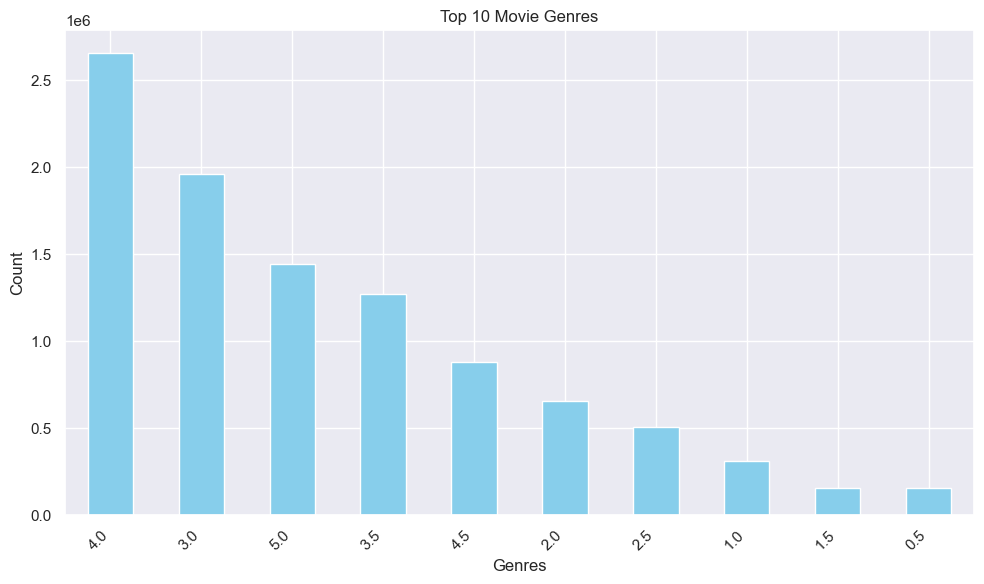

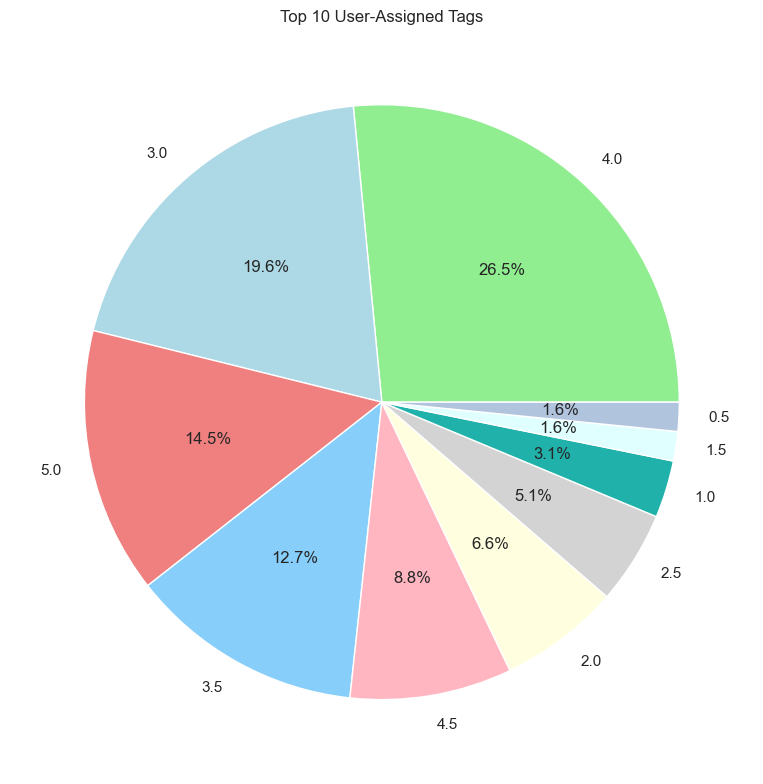

In [84]:
# Visualize distribution of movie genres using a bar plot
plt.figure(figsize=(10, 6))
genre_counts = train['rating'].value_counts().head(10)  
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

# Visualize distribution of user-assigned tags using a pie chart
plt.figure(figsize=(8, 8))
tag_counts = train['rating'].value_counts().head(10) 
tag_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'lightcoral', 'lightskyblue', 'lightpink', 'lightyellow', 'lightgrey', 'lightseagreen', 'lightcyan', 'lightsteelblue'])
plt.title('Top 10 User-Assigned Tags')
plt.ylabel('') 
plt.tight_layout()
plt.show()

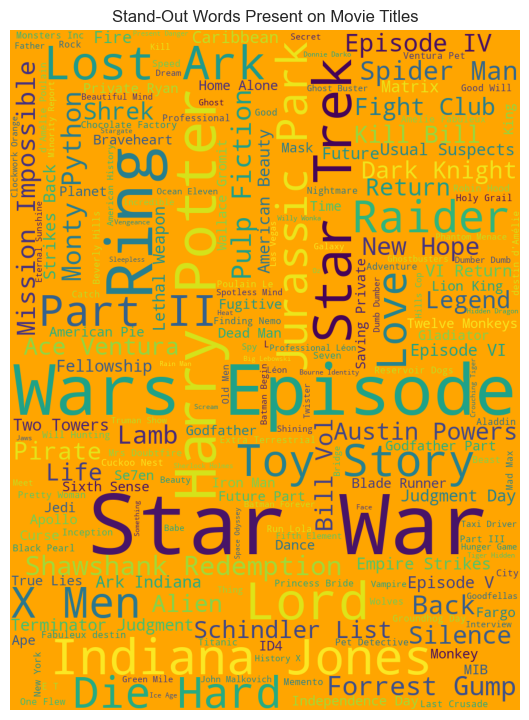

In [85]:
# Wordcloud of movie titles
movie = movies['title'] = movies['title'].astype('str')
wordcloud = ' '.join(movie)
title_wordcloud = WordCloud(stopwords = STOPWORDS,background_color = 'orange',
                            height = 1200, width = 900).generate(wordcloud)
plt.figure(figsize = (14,7), facecolor=None)
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title('Stand-Out Words Present on Movie Titles')
plt.tight_layout(pad=0)
plt.show()

In [70]:
#From movie data, convert timestamp to datetime
movies['time_dt'] = movies['timestamp'].apply(lambda x: datetime.fromtimestamp(x))

# Extract year, month, day, day-of-week Respectively
movies['Year'] = movies['time_dt'].dt.year
movies['Month'] = movies['time_dt'].dt.month
movies['Day'] = movies['time_dt'].dt.day
movies['Day of Week'] = movies['time_dt'].dt.dayofweek

In [71]:
# View DateTime Columns
movies.head(2)

,userId,movieId,rating,timestamp,title,genres,time_dt,Year,Month,Day,Day of Week
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,2018-02-11 13:53:12,2018,2,11,6
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy,2008-03-23 04:18:59,2008,3,23,6


<a id="five"></a>
## 5. DATA PROCESSING
<a href=#cont>Back to Table of Contents</a>


In [76]:
#check for missing values
# set to display full text in df
pd.set_option('display.max_colwidth', -1)     

# List Names of Data sets
names_c = ['Train Null Count', 'Test Null Count','Genome Score Null Count', 
           'Tags Null Count', 'links Null Count', 'Movies Null Count', 
           'IMDB Null Count', 'Genome Tags Null Count' ]
# Generate a list of each data size
null_count = [train.isnull().sum(), test.isnull().sum(), genome_scores.isnull().sum(), 
         tags.isnull().sum(), links.isnull().sum(), movies.isnull().sum(), 
         imdb_data.isnull().sum(), genome_tags.isnull().sum()]
# Place & view result in Pandas DataFrame
data_null_count = pd.DataFrame(list(zip(names_c, null_count)), columns=['Data', 'Null Count'])
data_null_count

C:\Users\suppo\AppData\Local\Temp\ipykernel_18920\2019247838.py:3: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



,Data,Null Count
0,Train Null Count,userId 0 movieId 0 rating 0 timestamp 0 dtype: int64
1,Test Null Count,userId 0 movieId 0 dtype: int64
2,Genome Score Null Count,movieId 0 tagId 0 relevance 0 dtype: int64
3,Tags Null Count,userId 0 movieId 0 tag 16 timestamp 0 dtype: int64
4,links Null Count,movieId 0 imdbId 0 tmdbId 107 dtype: int64
5,Movies Null Count,userId 0 movieId 0 rating 0 timestamp 0 title 0 genres 0 time_dt 0 Year 0 Month 0 Day 0 Day of Week 0 dtype: int64
6,IMDB Null Count,movieId 0 title_cast 10068 director 9874 runtime 12089 budget 19372 plot_keywords 11078 dtype: int64
7,Genome Tags Null Count,tagId 0 tag 0 dtype: int64


In [77]:
# check duplicates
duplicates = train.duplicated(['userId', 'movieId', 'rating'])

print("Number of duplicate records:", sum(duplicates))

Number of duplicate records: 0


In [78]:
movies.head(2)

,userId,movieId,rating,timestamp,title,genres,time_dt,Year,Month,Day,Day of Week
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,2018-02-11 13:53:12,2018,2,11,6
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy,2008-03-23 04:18:59,2008,3,23,6


In [79]:
# so we simply have to call the split function on |
movies['genres'] = movies.genres.str.split('|')

In [80]:
# the function to extract titles
def extract_title(title):

    year = title[len(title)-5:len(title)-1]

  # some movies do not have the info about year in the column title. So, we should take care of the case as well.
    if year.isnumeric():
        title_no_year = title[:len(title)-7]
        return title_no_year

    else:
        return title


# the function to extract years
def extract_year(title):

    year = title[len(title)-5:len(title)-1]

  # some movies do not have the info about year in the column title. So, we should take care of the case as well.
    if year.isnumeric():
        return int(year)

    else:
        return np.nan

In [81]:
# Change the column name from title to title_year
movies.rename(columns={'title':'title_year'}, inplace=True) 
# remove leading and ending whitespaces in title_year
movies['title_year'] = movies['title_year'].apply(lambda x: x.strip()) 
 # create the column for title
movies['title'] = movies['title_year'].apply(extract_title)
# create the column for year
movies['prod_year'] = movies['title_year'].apply(extract_year) 

In [82]:
#drop rows that contain any value in the list
print('BEFORE', movies.shape)
movies = movies[movies.userId != 72315]
print('AFTER', movies.shape)

BEFORE (10000038, 13)
AFTER (9987086, 13)


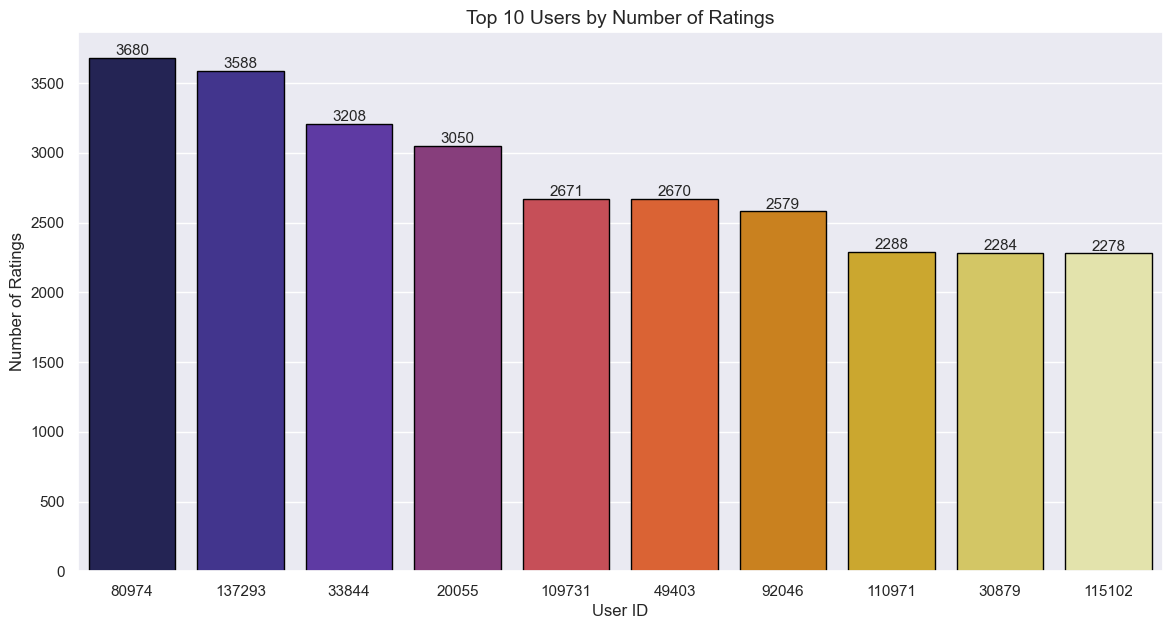

In [83]:
user_ratings_count(movies, 10)

In [86]:
# CHECK
movies.head(3)

,userId,movieId,rating,timestamp,title_year,genres,time_dt,Year,Month,Day,Day of Week,title,prod_year
0,5163,57669,4.0,1518349992,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]",2018-02-11 13:53:12,2018,2,11,6,In Bruges,2008.0
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),[Comedy],2008-03-23 04:18:59,2008,3,23,6,Father of the Bride Part II,1995.0
2,146790,5459,5.0,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (2002),"[Action, Comedy, Sci-Fi]",2004-02-08 06:45:39,2004,2,8,6,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2),2002.0


<a id="six"></a>
## 6. Feature Engineering
<a href=#cont>Back to Table of Contents</a>

In [87]:
# Visual of Rating Distribution BEFORE SAMPLING
before_sampling = np.mean(movies["rating"])
print (f'Average rating in Our Dataset BEFORE SAMPLING: {before_sampling}')

Average rating in Our Dataset BEFORE SAMPLING: 3.5339671151324823


In [88]:
'''
USE TO AVOID COMPUTATIONAL ISSUES

Ignore & Run with Full Data Set If your RAM can Carry it
'''

# Sampling out 1% the size of our Data population for the Experiment.
print('Shape of our Actual TRAIN Dataset', movies.shape)
movies = movies.sample(frac=0.002, random_state=42)
print('0.2 % of our TRAIN Dataset', movies.shape)

Shape of our Actual TRAIN Dataset (9987086, 13)
0.2 % of our TRAIN Dataset (19974, 13)


In [89]:
# Reset Indexing after sampling to start from zero
movies.reset_index(drop=True, inplace=True)
# Check
movies.head().index

RangeIndex(start=0, stop=5, step=1)

In [90]:
# Visual of Rating Distribution AFTER sampling
after_sampling = np.mean(movies["rating"])
print (f'Average rating in Our Dataset AFTER SAMPLING: {after_sampling}')

Average rating in Our Dataset AFTER SAMPLING: 3.5322919795734453


In [91]:
# Drawing Comparison
print(f'Comparing both Average Rating, BEFORE = {before_sampling} and AFTER = {after_sampling}.')
print(' This proves the representative nature of our sample dataset.')

Comparing both Average Rating, BEFORE = 3.5339671151324823 and AFTER = 3.5322919795734453.
 This proves the representative nature of our sample dataset.


In [92]:
# DATA STRUCTURE CHECK
movies.head(2)

,userId,movieId,rating,timestamp,title_year,genres,time_dt,Year,Month,Day,Day of Week,title,prod_year
0,24189,288,3.0,848944072,Natural Born Killers (1994),"[Action, Crime, Thriller]",1996-11-25 19:47:52,1996,11,25,0,Natural Born Killers,1994.0
1,143435,6565,2.5,1499735936,Seabiscuit (2003),[Drama],2017-07-11 03:18:56,2017,7,11,1,Seabiscuit,2003.0


In [95]:
# create an object for TfidfVectorizer
tfidf_vector = TfidfVectorizer(stop_words='english') 

# apply the object to the genres column
tfidf_matrix = tfidf_vector.fit_transform(movies['genres'].apply(lambda x: ' '.join(map(str, x)))) 

# The list and order of genres used in the vectorization are as follows
print(list(enumerate(tfidf_vector.get_feature_names_out())))


[(0, 'action'), (1, 'adventure'), (2, 'animation'), (3, 'children'), (4, 'comedy'), (5, 'crime'), (6, 'documentary'), (7, 'drama'), (8, 'fantasy'), (9, 'fi'), (10, 'film'), (11, 'genres'), (12, 'horror'), (13, 'imax'), (14, 'listed'), (15, 'musical'), (16, 'mystery'), (17, 'noir'), (18, 'romance'), (19, 'sci'), (20, 'thriller'), (21, 'war'), (22, 'western')]


In [96]:
# Let's see the examples of the vectorization for the first 5 movies.
print(tfidf_matrix[:5])

  (0, 20)	0.5464442963378705
  (0, 5)	0.6533050856121261
  (0, 0)	0.5240144044901267
  (1, 7)	1.0
  (2, 7)	0.44864690566190196
  (2, 20)	0.5733906884656236
  (2, 5)	0.685521022595893
  (3, 9)	0.6153839882809782
  (3, 19)	0.6153839882809782
  (3, 0)	0.49254958525492015
  (4, 13)	0.6361115489245988
  (4, 9)	0.4223713268289684
  (4, 19)	0.4223713268289684
  (4, 20)	0.35253388370233574
  (4, 0)	0.3380634300127261


In [97]:
# Check the Matrix Shape
tfidf_matrix.shape

(19974, 23)

In [98]:
# the first row vector of tfidf_matrix (Employee of the Month)
tfidf_matrix.todense()[0]

matrix([[0.5240144 , 0.        , 0.        , 0.        , 0.        ,
         0.65330509, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.5464443 , 0.        , 0.        ]])

In [99]:
# create the cosine similarity matrix 
sim_matrix = linear_kernel(tfidf_matrix, tfidf_matrix)
print(sim_matrix)

[[1.         0.         0.76118044 ... 0.68060794 0.         0.29544134]
 [0.         1.         0.44864691 ... 0.40115671 0.55588149 0.        ]
 [0.76118044 0.44864691 1.         ... 0.89414796 0.24939451 0.31001022]
 ...
 [0.68060794 0.40115671 0.89414796 ... 1.         0.22299559 0.277195  ]
 [0.         0.55588149 0.24939451 ... 0.22299559 1.         0.        ]
 [0.29544134 0.         0.31001022 ... 0.277195   0.         1.        ]]


<a id="seven"></a>
# 7. Modeling
<a href=#cont>Back to Table of Contents</a>


In [105]:
# create a function to find the closest title
def matching_score(a,b):

      return fuzz.ratio(a, b)

In [106]:
# create a function to find the closest title
def matching_score(a,b):

      return fuzz.ratio(a, b)

In [107]:
# the function to convert from index to title
def get_title_from_index(index):

      return movies[movies.index == index]['title'].values[0]

In [108]:
# the function to return the most similar title to the words a user types
def find_closest_title(title):

    leven_scores = list(enumerate(movies['title'].apply(matching_score, b=title)))
    sorted_leven_scores = sorted(leven_scores, key=lambda x: x[1], reverse=True)
    closest_title = get_title_from_index(sorted_leven_scores[0][0])
    distance_score = sorted_leven_scores[0][1]

    return closest_title, distance_score

In [109]:
def contents_based_recommender(movie_user_likes, how_many):
    # Get closest Title & Dist. score from Inputed Title
    closest_title, distance_score = find_closest_title(movie_user_likes)

    if distance_score == 100:
        # Get movie idex using declared fuunction
        movie_index = get_index_from_title(closest_title)
        # Apply index to similarity matrix and obtain list of similar movie index
        movie_list = list(enumerate(sim_matrix[int(movie_index)]))
        # Return a list of similar movies
        similar_movies = list(filter(lambda x:x[0] != int(movie_index), 
                                     sorted(movie_list, key=lambda x:x[1], reverse=True))) 
        print('Here\'s the list of movies similar to '+'\033[1m'+str(closest_title)+'\033[0m'+'.\n')
        
        for i, s in similar_movies[: how_many]: print(get_title_year_from_index(i))
    
    else:
        print('Did you mean '+'\033[1m'+str(closest_title)+'\033[0m'+'?','\n')
        movie_index = get_index_from_title(closest_title)
        movie_list = list(enumerate(sim_matrix[int(movie_index)]))
        similar_movies = list(filter(lambda x:x[0] != int(movie_index), 
                                     sorted(movie_list,key=lambda x:x[1], reverse=True)))
        print('Here\'s the list of movies similar to '+'\033[1m'+str(closest_title)+'\033[0m'+'.\n')
        
        for i,s in similar_movies[:how_many]: print(get_title_year_from_index(i))

## Collaborative-Based Filtering Recommender

In [114]:
"""
SETUP TRAIN & VALIDATION DATASET
"""

# We split our Dataset to enable us validate here after modeling.
print('initial shape of TRAIN: ', train.shape)
train_data = train.iloc[:int(train.shape[0]*0.0005)]   # <--- Used if Computing capcity is an Issue
# train_data = train_df_act                                          # <--- Alternate Option for Full Data Set

val_data = test.iloc[int(test.shape[0]*0.00001):]
print('Final shape of TRAIN Dataset: ', train_data.shape)
print('Final shape of Validation Dataset: ', val_data.shape)

initial shape of TRAIN:  (10000038, 4)
Final shape of TRAIN Dataset:  (5000, 4)
Final shape of Validation Dataset:  (4999969, 2)


In [118]:
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split


In [119]:
'''Recall, We've imported SURPRISE at our Import section '''
from surprise.model_selection import train_test_split

# This is to specify how to read the data frame.
reader = Reader(rating_scale=(min_rating, max_rating))     # i.e 0.5 & 5 Respectively; SEE EDA

# This creates the train-data from our dataframe
data = Dataset.load_from_df(train_data[['userId', 'movieId', 'rating']], reader)

# Get Train_Valdiation Data Set
trainset, valset = train_test_split(data, test_size=.25, random_state=42)

 ### User-User Collaborative Based Filtering

In [123]:
from surprise import KNNWithMeans

from surprise.model_selection import cross_validate


In [124]:
# Compute similarities between users using cosine distance
sim_options = {"name": "cosine",
               "user_based": True}  

# Evaluate the model 
user = KNNWithMeans(sim_options=sim_options)
cv = cross_validate(user, data, cv=2, measures=['RMSE'], verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 2 split(s).

                  Fold 1  Fold 2  Mean    Std     
RMSE (testset)    1.0996  1.0721  1.0858  0.0137  
Fit time          0.08    0.08    0.08    0.00    
Test time         0.02    0.02    0.02    0.00    


### Item-Item Collaborative Based Filtering

In [125]:
# Compute similarities between items using cosine distance
sim_options = {"name": "cosine",
               "user_based": False}  

# Fit the KNNwithmeans algorithm to the training set
item_based = KNNWithMeans(sim_options=sim_options)

# Evaluate the model 
cv = cross_validate(item_based, data, cv=2, measures=['RMSE'], verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 2 split(s).

                  Fold 1  Fold 2  Mean    Std     
RMSE (testset)    1.0796  1.0786  1.0791  0.0005  
Fit time          0.03    0.03    0.03    0.00    
Test time         0.02    0.02    0.02    0.00    


#### Observations and limitations:

In [127]:
import gc


In [128]:
# Collect Gabdge
gc.collect()

12565

#### Applying Matrix Factorization Considering Several Algorithms
#### 1a SlopeOne Algorithm

In [133]:
from surprise import SlopeOne
from surprise import accuracy


In [134]:
# Initiate Model
slo_model = SlopeOne()
# Fit traind Data
slo_model.fit(trainset)
# Validate Predictions
slo_predictions = slo_model.test(valset)
# Return RMSE Result
slo_rmse=accuracy.rmse(slo_predictions)

RMSE: 1.0896


In [135]:
# Collect Gabdge
gc.collect()

20

#### Observations and limitations:

#### 1b. Non-Negative Matrix Factorization Algorithm

In [137]:
from surprise.prediction_algorithms.matrix_factorization import NMF


In [138]:
# Initiate Model
nmf_model = NMF(n_epochs=10, n_factors=200, random_state=42, verbose=True)
# Fit traind Data
nmf_model.fit(trainset)
# Validate Predictions
nmf_predictions =nmf_model.test(valset)
# Return RMSE Result
nmf_rmse = accuracy.rmse(nmf_predictions)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
RMSE: 1.1003


In [139]:
# Collect Gabdge
gc.collect()

485

#### Observations and limitations:

#### 1c CoClustering Algorithm

In [141]:
from surprise.prediction_algorithms.co_clustering import CoClustering


In [142]:
# Initiate Model
cc_model = CoClustering(n_epochs=10, random_state=42)
# Fit traind Data
cc_model.fit(trainset)
# Validate Predictions
cc_predictions = cc_model.test(valset)
# Return RMSE Result
cc_rmse=accuracy.rmse(cc_predictions)

RMSE: 1.0964


In [143]:
# Collect Gabdge
gc.collect()

477

#### Observations and limitations:

#### 1d Singular Value Decomposition (SVD)

In [145]:
from surprise.prediction_algorithms.matrix_factorization import SVD


In [146]:
# Initiate Model
svd_model = SVD(n_epochs=60, n_factors=300, init_std_dev=0.004, lr_all=0.006, reg_all=0.04, random_state=42)
# Fit traind Data
svd_model.fit(trainset)
# Validate Predictions
svd_predictions = svd_model.test(valset)
# Return RMSE Result
svd_rmse = accuracy.rmse(svd_predictions)

RMSE: 1.0527


In [147]:
# Collect Gabdge
gc.collect()

485

#### 1e Singular Value Decomposition plus-plus (SVDpp)

In [149]:
from surprise.prediction_algorithms.matrix_factorization import SVDpp


In [150]:
# Initiate Model
svdpp_model = SVDpp(n_epochs=10,n_factors=400,init_std_dev=0.001,random_state=42, verbose=True)
# Fit traind Data
svdpp_model.fit(trainset)
# Validate Predictions
svdpp_predictions = svdpp_model.test(valset)
# Return RMSE Result
svdpp_rmse = accuracy.rmse(svdpp_predictions)

 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
RMSE: 1.0505


In [151]:
# Collect Gabdge
gc.collect()

510

#### 1f BaselineOnly algorithm

In [153]:
from surprise.prediction_algorithms.baseline_only import BaselineOnly


In [154]:
# Initiate Model
bsl_options = {'method': 'sgd','n_epochs': 10}
# Fit traind Data
blo_model = BaselineOnly(bsl_options=bsl_options,verbose=True)
# Validate Predictions
blo_model.fit(trainset)
# Return RMSE Result
blo_predictions = blo_model.test(valset)
# Calculate RMSE
blo_rmse = accuracy.rmse(blo_predictions)

Estimating biases using sgd...
RMSE: 1.0537


In [155]:
# Collect Gabdge
gc.collect()

478

<a id="eight"></a>
## 8. MODEL PERFORMANCE
<a href=#cont>Back to Table of Contents</a>

In [158]:
pip install fuzzywuzzy


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Obtaining dependency information for fuzzywuzzy from https://files.pythonhosted.org/packages/43/ff/74f23998ad2f93b945c0309f825be92e04e0348e062026998b5eefef4c33/fuzzywuzzy-0.18.0-py2.py3-none-any.whl.metadata


In [159]:
from fuzzywuzzy import fuzz


C:\Users\suppo\AppData\Roaming\Python\Python311\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning:

Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning



In [163]:
def get_index_from_title(title):
    return movies[movies['title'] == title].index.values[0]
def get_title_year_from_index(index):
    return movies.iloc[index]['title_year']


In [164]:
# Test Content Based Recommender with Acurate Movie Title
contents_based_recommender('Invictus', 5)

Here's the list of movies similar to Invictus.

Seabiscuit (2003)
Legend of 1900, The (a.k.a. The Legend of the Pianist on the Ocean) (Leggenda del pianista sull'oceano) (1998)
One Flew Over the Cuckoo's Nest (1975)
October Sky (1999)
Ali (2001)


In [165]:
# Test Content Based Recommender with NON_Acurate Movie Title
contents_based_recommender('Envictu', 5)

Did you mean Invictus? 

Here's the list of movies similar to Invictus.

Seabiscuit (2003)
Legend of 1900, The (a.k.a. The Legend of the Pianist on the Ocean) (Leggenda del pianista sull'oceano) (1998)
One Flew Over the Cuckoo's Nest (1975)
October Sky (1999)
Ali (2001)


In [166]:
# Composite RMSE Result of Collaborative models in DataFrame 
rmse_scores =[nmf_rmse, slo_rmse, cc_rmse, svd_rmse, svdpp_rmse, blo_rmse]
models =['NMF', 'SlopeOne', 'CoClustering', 'SVD', 'SVD++', 'BaselineOnly']

accuracy_data = pd.DataFrame({'model':models,'RMSE':rmse_scores})

In [167]:
# Print Result
accuracy_data.sort_values(by='RMSE')

,model,RMSE
4,SVD++,1.050516
3,SVD,1.052653
5,BaselineOnly,1.053694
1,SlopeOne,1.089630
2,CoClustering,1.096383
0,NMF,1.100257


In [168]:
# Collect Gabdge
gc.collect()

1323

C:\Users\suppo\AppData\Local\Temp\ipykernel_18920\3610457325.py:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



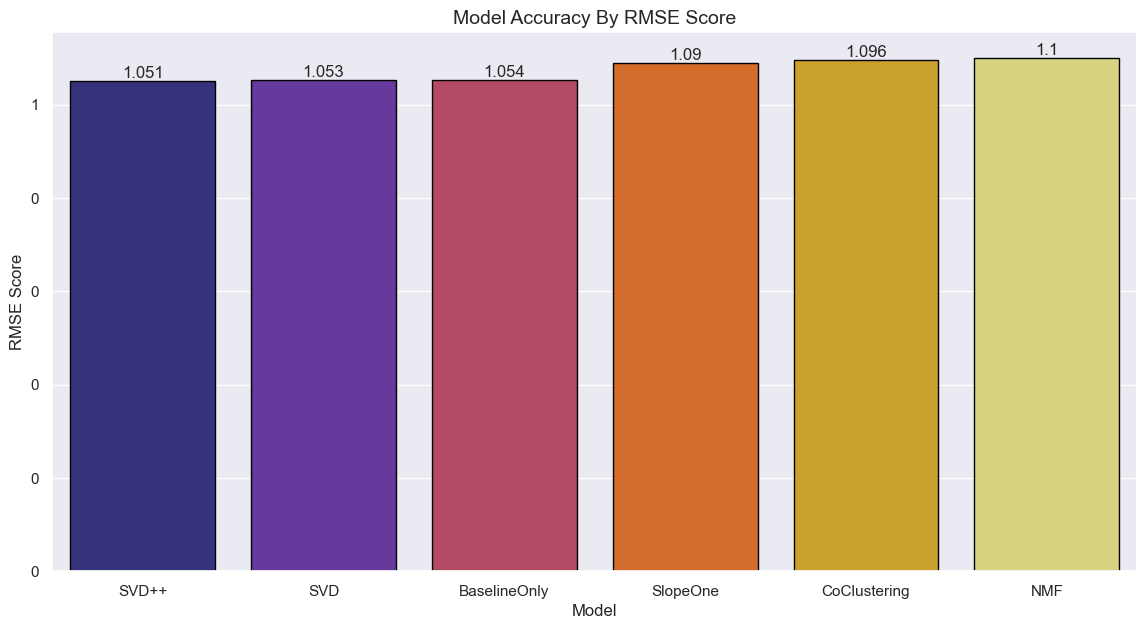

In [169]:
# Visualize Outcome of Various Model Based Collab Recommenders
fig, ax = plt.subplots(figsize=(14,7))
# Plot Bar chart
sns.barplot(data=accuracy_data.sort_values(by='RMSE'), x='model', 
            y='RMSE', palette="CMRmap", edgecolor="black", ax=ax)
# Set Labels
ax.set_xlabel("Model")
ax.set_ylabel('RMSE Score')
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), 
            round(p.get_height(),3), fontsize=12, ha="center", va='bottom')
plt.title('Model Accuracy By RMSE Score', fontsize=14)
plt.show()

<a id="nine"></a>
## 9. SAVING & EXPORTING MODEL
<a href=#cont>Back to Table of Contents</a>


In [172]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import train_test_split

# Load the dataset
data = Dataset.load_builtin('ml-100k')

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.25)

# Instantiate and train the SVD model
svd = SVD()
svd.fit(trainset)


Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to C:\Users\suppo/.surprise_data/ml-100k


In [178]:
# Assuming svd_model is your trained SVD model
svd = svd_model

# Creating Kaggle submission file
predictions = []
for i, row in test.iterrows():
    x = svd.predict(row.userId, row.movieId)
    pred = x.est
    predictions.append(pred)

test['Id'] = test['userId'].map(str) + '_' + test['movieId'].map(str)
results = pd.DataFrame({"Id": test['Id'], "rating": predictions})

# Save as CSV locally
results.to_csv("FN2_submission_4.csv", index=False)


In [184]:
# ## SAVING TRAINED MODEL
from surprise import dump
import os

model_filename = "./EDSA_FN2_Simple_Recommender_1.pkl"
print (">> Starting dump")
# Dump algorithm and reload it.
file_name = os.path.expanduser(model_filename)
dump.dump(file_name, algo=svd)
print (">> Dump done")
print(model_filename)

>> Starting dump
>> Dump done
./EDSA_FN2_Simple_Recommender_1.pkl


In [180]:
# Create dictionaries for the data we want to log
# This had to be defined since that applied to our model is the best from the grid search.

params ={"random_state": 42,
         "model_type ": "SVD",
         "biased": True, 
         "verbose": True,
         'n_epochs': 60, 
         'n_factors': 300, 
         'init_std_dev': 0.004, 
         'lr_all': 0.006, 
         'reg_all': 0.04
        }

best_metrics ={"RMSE" : accuracy_data}

In [181]:
#log parameters and results
experiment.log_parameters(params)
experiment.log_metric('RMSE', accuracy_data)
experiment.log_notebook('3.0_EDSA_movie_recommendation_2022_Notebook.ipynb', overwrite=False)

COMET WARNING: Cannot safely convert           model      RMSE
0  NMF           1.100257
1  SlopeOne      1.089630
2  CoClustering  1.096383
3  SVD           1.052653
4  SVD++         1.050516
5  BaselineOnly  1.053694 object to a scalar value, using its string representation for logging. Resulting string might be invalid
COMET ERROR: We failed to read file 3.0_EDSA_movie_recommendation_2022_Notebook.ipynb for uploading.
Please double-check the file path and permissions


In [182]:
# STRICTLY FOR LOCAL JUPYTER NOTEBOOKS
experiment.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/sanelisiwe19/edsa-movie-recommendation/7622a445615a46b49800c743fe9afe89
COMET INFO:   Metrics:
COMET INFO:     RMSE :           model      RMSE
0  NMF           1.100257
1  SlopeOne      1.089630
2  CoClustering  1.096383
3  SVD           1.052653
4  SVD++         1.050516
5  BaselineOnly  1.053694
COMET INFO:   Parameters:
COMET INFO:     biased       : True
COMET INFO:     init_std_dev : 0.004
COMET INFO:     lr_all       : 0.006
COMET INFO:     model_type   : SVD
COMET INFO:     n_epochs     : 60
COMET INFO:     n_factors    : 300
COMET INFO:     norm         : l2
COMET INFO:     random_state : 42
COMET INFO:     reg_all     

In [183]:
# Unhash to Display Comet Experiment
experiment.display()

<a id="ten"></a>
## 10. Conclusion
<a href=#cont>Back to Table of Contents</a>
​